# Tensorflow 基础操作
---

### Tensor属性
---
- Tensor.device 返回字符串
- Tensor.numpy() 返回np对象的数据
- Tensor.dim  tf.rank(Tensor)
- Tensor.shape
- Tensor.cpu()  \ Tensor.gpu() 切换到CPU/GPU内存中

In [13]:
import tensorflow as tf
import numpy as np

with tf.device('cpu'):
    a = tf.constant([1])
    
a.device #  '/job:localhost/replica:0/task:0/device:CPU:0'
print(a.numpy(),type(a.numpy()))
print(a.ndim)  # 维度为1
print(tf.rank(a))
a

[1] <class 'numpy.ndarray'>
1
tf.Tensor(1, shape=(), dtype=int32)


<tf.Tensor: id=27, shape=(1,), dtype=int32, numpy=array([1])>


- tf.is_tensor(Tensor) 检查Tensor类型
- Tensor.dtype 查看类型（tf.float32）
- 类型转换 转换为Tensor对象
   - tf.convert_to_tensor(ndarray,dtype = tf.int32)
   - tf.cast()



In [20]:
a = np.arange(10).reshape(2,5)
tf.is_tensor(a)
tf_a = tf.convert_to_tensor(a,dtype = tf.int32)


### tf.Variable 可优化变量
---

Variable变量可以理解为神经网络中的连接参数值，具有自动可求导的特性

tf.Variable(init ， name = '')

### 创建Tensor
---

- numpy转换为Tensor
   - tf.convert_to_tensor()
- zeros、ones、random
   - tf.zeros([])  # 空括号表示创建标量0
   - tf.fill(shape,value)  全部填充为value
   - random
      - tf.random.normal(shape,mean,stddev)  # 正态分布
      - tf.random.uniform(shape,minval,maxval)
      - tf.random.truncated_normal  # 截断正态分布距离中心过远的值 防止发生梯度消失
      - tf.random.suffle(idx)  # 随机打散 random permutation
      - tf.gather(data,suffled_idx) # 按照idx的顺序重排
   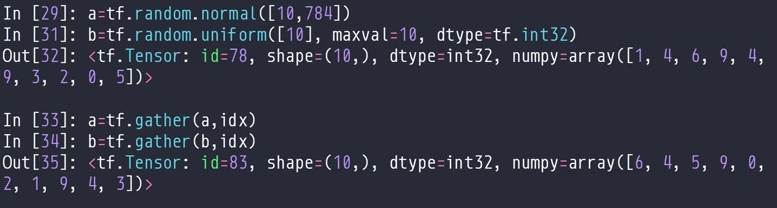
   
      - 
- constant

### 索引
---
 
基础索引
> [idx][idx][idx]

numpy索引
> [idx,idx,..]

冒号表达式
> start:end

> start:end:step

省略号
> a.shape  # [4,5,6,7]

> a[0,...,1]  # 不用写出后面的维度


In [104]:
import tensorflow as tf
import numpy as np


a = tf.ones([2,3,4,5])

a[0][0]
a[0,0]
a[:,0,0,0]
a[0,0,0,:]
u = tf.reshape(a,(6,20))
u[:,::2].shape
z = tf.convert_to_tensor(np.arange(10))
tf.random.shuffle(z)
z[::-1]  #倒序
u.shape
u[...,1].shape
a.shape
a[1,...,1].shape

TensorShape([3, 4])

In [85]:
b = np.array(np.arange(10).reshape(2,5))
b.shape
b = b[:,:,np.newaxis]
b.shape
b[1,1,0]
b = b.reshape(2,5)
b
print(b)
c = b@b.T # 矩阵相乘
np.linalg.inv(c)
d = np.array([1,2])
b.T*d
z = b.T+d
z[:,1].reshape(5,1)

u = np.ones([5,2])
v = np.ones([5])*3
v = v.reshape(5,1)
# u+v
print(u.T.shape)
print(v.shape)
t = u.T@v
print(t.shape)
t[:,0]

[[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)
(5, 1)
(2, 1)


array([15., 15.])

### Selective Indexing
---
索引顺序不必按照tensor的顺序

tf.gather(tensor,axis,indices)
在某一个维度上采集indices列表中的数据

numpy中可以直接用下标加列表的形式，tensorflow使用tf.gather这种方法


- tf.gather
- tf.gather_nd
- tf.boolean_mask

In [121]:
a = tf.convert_to_tensor(np.arange(10).reshape(5,2))

tf.gather(a,axis=0,indices=(1,3,0))   # a[(1,3,0),:]
a = tf.convert_to_tensor(np.arange(100).reshape(5,2,2,5))
tf.gather_nd(a,[[0,0,0,0],[1,1,1,1]]).shape
tf.gather_nd(a,[[1]]).shape
tf.gather_nd(a,[1]).shape


TensorShape([2, 2, 5])

### 维度变换
---
※※※
- shape
- ndim
- reshape
- expand_dims/squeeze
- transpose
- broadcast_to



#### reshape
-1表示自动计算

`tf.reshape(a,[-1,5])`

#### transpose
两个维度之间的交换

默认是轴倒置 axis -->[0,1,2] >[2,1,0]
手动交换轴 perm

`tf.transpose(a,perm=[0,2,1])  # 表示 1 2两个维度交换`

#### expand_dims/squeeze
扩展/压缩维度

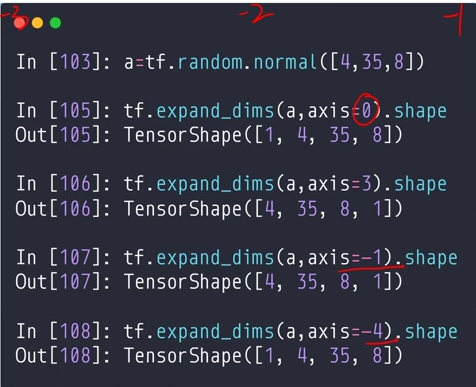




### 广播
---
tensorflow可以隐式的使用广播机制，也可以使用boardcast_to方法扩展维度

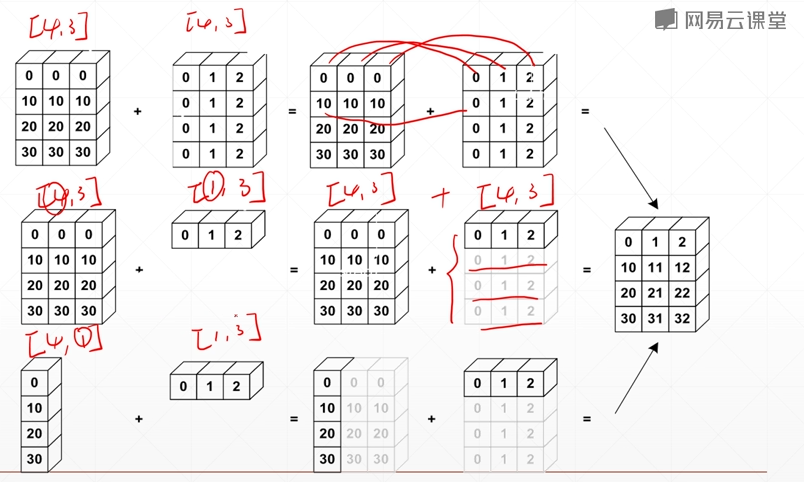

### 基本数学运算
---

- +、-、*、/
- **、pow、square
- sqrt
- //、%
- exp,log
- @、matmul

逐元素运算
矩阵运算   

    高级：[b,3,4]@[b,4,5] -- > [b,3,5]
    
   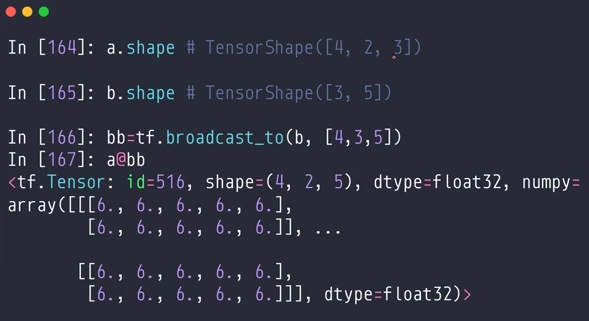
维度运算   eg. 按维度取最大值

<br>
<br>

tf.math.log  默认以e为底，没有以2为底的，需要换底公式手动

tf.exp

Y = X@W+b  